# Analise de Demanda

Imagine que trabalhamos em uma industria de calçados e queremos analisar a distribuição do estoque das lojas.

Objetivos:

1. Ler a base de dados utilizar os principios da analise exploratoria de dados visto anteriormente.

2. Analisar a distribuição do estoque e verificar se ela se assemelha a alguma distribuição conhecida.

3. Calcular qual seria a amostra necessária para estimarmos a média do estoque de cada uma das lojas com margem de erro de 2% e 10% e nivel de significancia de 5%


 Antes de comecarmos vamos fazer a leitura dos pacotes necessários

In [3]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt


### 1. Análise exploratória dos dados

In [8]:
# load csv file
df = pd.read_csv("data/estoque.csv", sep = ";")

In [ ]:
# display first 5 rows
df.head(5)

,id_loja,estoque,data
0,1,167,02/01/23
1,1,160,03/01/23
2,1,184,04/01/23
3,1,164,05/01/23
4,1,188,06/01/23


In [9]:
# Verify data type
df.dtypes

id_loja     int64
estoque     int64
data       object
dtype: object

In [10]:
# convert column "data" to datetime type
df["data"] = pd.to_datetime(df["data"])

/tmp/ipykernel_21914/1698370164.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["data"] = pd.to_datetime(df["data"])


In [11]:
# verify data type again
df.dtypes

id_loja             int64
estoque             int64
data       datetime64[ns]
dtype: object

In [12]:
# descriptive statistics
df.describe()

,id_loja,estoque,data
count,174.000000,174.000000,174
mean,2.000000,251.758621,2023-03-31 21:55:51.724137984
min,1.000000,75.000000,2023-01-02 00:00:00
25%,1.000000,92.000000,2023-01-26 00:00:00
50%,2.000000,181.500000,2023-02-19 12:00:00
75%,3.000000,484.000000,2023-05-02 00:00:00
max,3.000000,500.000000,2023-12-02 00:00:00
std,0.818853,171.722653,NaN


Pelo describe acima vemos que temos na base o estoque e a data de mediÃ§Ã£o de 3 lojas da empresa de calÃ§ados

vamos agora analisar alguns dados por loja

In [16]:
# create table
df.groupby(["id_loja"]).agg({"estoque": ["mean", "min", "max", "std"], "data": ["min", "max"]})

estoque                           data           
               mean  min  max       std        min        max
id_loja                                                      
1        179.965517  155  196  9.689867 2023-01-02 2023-12-02
2         87.568966   75  101  6.229843 2023-01-02 2023-12-02
3        487.741379  474  500  5.223296 2023-01-02 2023-12-02

Pela tabela acima, vemos que:
- A loja 3 tem uma média maior de estoque do que as outras lojas e desvio padrão menor, proximo a 5.
- A loja 2 possui uma média menor de estoque e desvio padrão proximo a 6
- A loja 1 possui média de apx 180 calçados e maior desvio padrão, apx 9.7

Vamos agora analisar o histograma da distribuição do estoque por loja

### 2. Analise da distribuição do estoque por loja

In [17]:
# Number of stores
numero_lojas =  df.id_loja.nunique() ### numero de lojas
numero_lojas

3

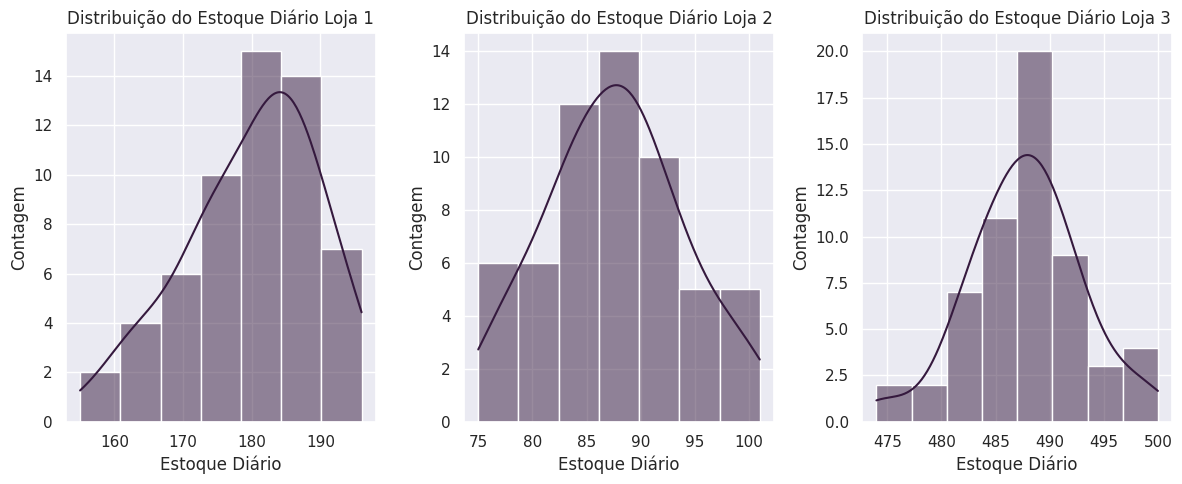

In [19]:
# Set palette
sns.set_palette("rocket")

# number of stores
numero_lojas =  df.id_loja.nunique()
# create number of columns = nuber of stores
fig, ax = plt.subplots(nrows=1, ncols=numero_lojas, figsize=(12, 5))
i = 0
# loop to create histogram
for loja in df.id_loja.unique():
  # histogram
  sns.set_theme(style="darkgrid")
  sns.histplot(df[df.id_loja == loja]["estoque"], ax=ax[i], kde=True, edgecolor=None)
  ax[i].set_title('Distribuição do Estoque Diário Loja {}'.format(loja))
  ax[i].set_xlabel('Estoque Diário')
  ax[i].set_ylabel('Contagem')
  # add count
  i = i + 1

plt.tight_layout()
plt.show()

Podemos ver que todos os estoques das lojas apresentam uma distribuiÃ§Ã£o em formato de sino, que se assemelha muito visualmente a distribuiÃ§Ã£o normal.
A loja 1 porÃ©m apresenta uma assimetria na distribuiÃ§Ã£o do estoque para a esquerda.

Alternativamente, poderiamos analisar em um unico grÃ¡fico

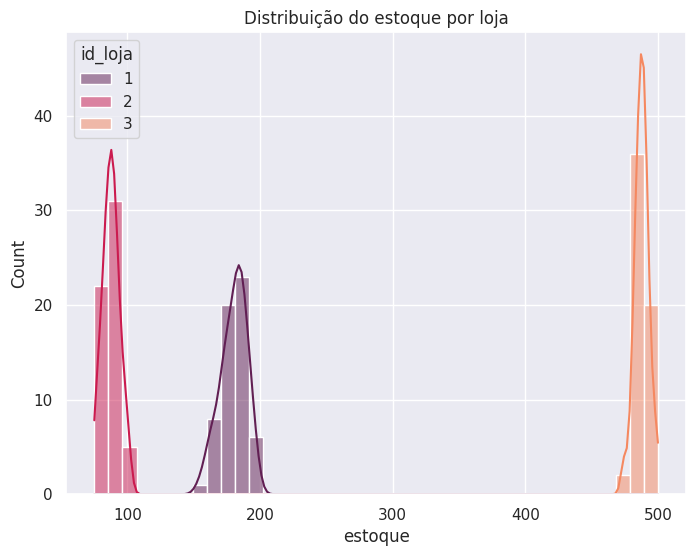

In [21]:
# create histogram in one figure
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="estoque", hue="id_loja", bins = 40,kde=True, palette=sns.color_palette("rocket", n_colors=3))
plt.title(label= "Distribuição do estoque por loja")
plt.show()

/tmp/ipykernel_21914/60961523.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='id_loja', y='estoque', palette=sns.color_palette("rocket", n_colors=3))


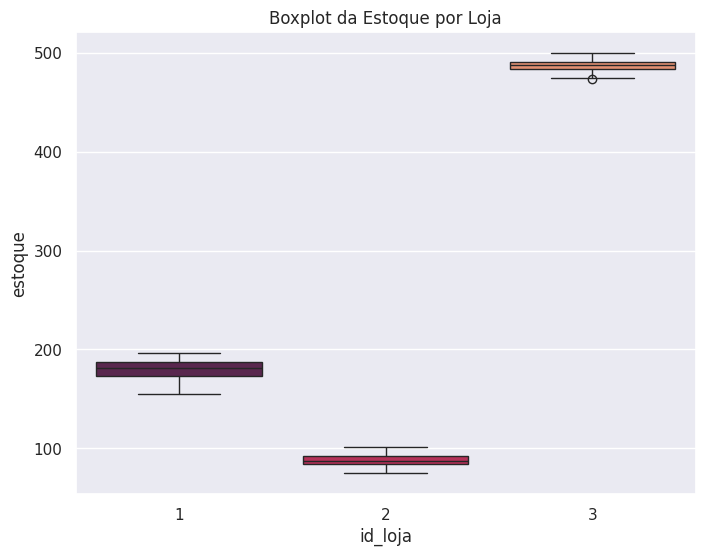

In [24]:
# create Boxplots
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='id_loja', y='estoque', palette=sns.color_palette("rocket", n_colors=3))
plt.title('Boxplot da Estoque por Loja')
plt.show()

Podemos perceber que o estoque da loja 3 Ã© bem maior do que o das outras lojas e nÃ£o existe overlap de estoques entre tais lojas. o que pode ser um indicativo de que:
1. As lojas apresentam compartamento de consume bem diferente, podendo estar localizadas em regioes ou pontos de venda diferentes
2. A loja 3 supostamente deve ser a que mais vende, necessitando assim de um maior estoque

## 3. Amostra necessária para estimarmos a média do estoque de cada uma das lojas

Para calcular a amostra necessária para compararmos a média do estoque de duas lojas vamos precisar da fórmula da margem de erro para médias em que o desvio padrão desconhecido, vamos verificar antes o tamanho da amostra que temos para decidir qual formula utilizar

In [33]:
# size
df[["id_loja","estoque"]].groupby("id_loja").count()

,estoque
id_loja,
1,58
2,58
3,58


Como temos 58 informações de estoque de cada uma das lojas podemos utilizar a aproximação de sigma = amplitude/4 ou sigma ou assumir que sigma é igual ao desvio padrão amostral

Assumindo o primeiro caso precisaremos da seguinte fórmula:

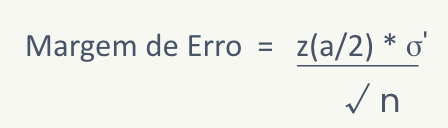



E seus respectivos inputs
- sigma ': estimado a partir da amplitude, portante necessitamos dos valores max, min do estoque de cada loja para dividir essa diferença por 4
- n é o que queremos descobrir
- z(a/2) é o valor da estatistica z para o ní­vel de significancia assumindo que a distribuição é bicaldal.

Vamos primeiramente obter os inputs da fórmula para depois substituirmos os valores.

1. Primeira Loja

In [ ]:
# Load SciPy 
from scipy.stats import norm

In [35]:
# first store

# calculate sigma using amplitude
sigma_linha = (df[df.id_loja == 1]["estoque"].max() - df[df.id_loja == 1]["estoque"].min())/4


# calculate z(a/2) for a = 5%
a = 0.05
z = norm.ppf(1-a/2)

# n = ((z*sigma_linha)/me)**2

# margem , me = 2%
me = 0.02
n = round(((z*sigma_linha)/me)**2,0)
print("O tamanho da amostra será de "+str(n)+" para margem de erro de 2% e 5% de significancia")
# margem de erro de 10%
me = 0.1 
n = round(((z*sigma_linha)/me)**2,0)
print("O tamanho da amostra será de "+str(n)+" para margem de erro de 10% e 5% de significancia")


O tamanho da amostra será de 1008983.0 para margem de erro de 2% e 5% de significancia
O tamanho da amostra será de 40359.0 para margem de erro de 10% e 5% de significancia


2. Todas as lojas

In [36]:
# calculate z(a/2) for a = 5%

a = 0.05
z = norm.ppf(1-a/2)

for loja in df.id_loja.unique():
  sigma_linha = (df[df.id_loja == loja]["estoque"].max() - df[df.id_loja == loja]["estoque"].min())/4

  # n = ((z*sigma_linha)/me)**2

  # margem 2% , me = 2%
  me = 0.02
  n = round(((z*sigma_linha)/me)**2,0)
  print("O tamanho da amostra será de "+str(n)+" para margem de erro de 2% e 5% de significancia para a loja "+str(loja))
  
  #margem 10% , me = 10%
  me = 0.1
  n = round(((z*sigma_linha)/me)**2,0)
  print("O tamanho da amostra será de "+str(n)+" para margem de erro de 10% e 5% de significancia para a loja "+str(loja))


O tamanho da amostra será de 1008983.0 para margem de erro de 2% e 5% de significancia para a loja 1
O tamanho da amostra será de 40359.0 para margem de erro de 10% e 5% de significancia para a loja 1
O tamanho da amostra será de 405754.0 para margem de erro de 2% e 5% de significancia para a loja 2
O tamanho da amostra será de 16230.0 para margem de erro de 10% e 5% de significancia para a loja 2
O tamanho da amostra será de 405754.0 para margem de erro de 2% e 5% de significancia para a loja 3
O tamanho da amostra será de 16230.0 para margem de erro de 10% e 5% de significancia para a loja 3


Utilizando a estimação de sigma com a segunda opção (assumindo que o desvio padrao amostral = populacional)

In [37]:
# calculate z(a/2) for a = 5%

a = 0.05
z = norm.ppf(1-a/2)

for loja in df.id_loja.unique():
  sigma_linha = df[df.id_loja == loja]["estoque"].std()

  # n = ((z*sigma_linha)/me)**2

  # margem 2% , me = 2%
  me = 0.02
  n = round(((z*sigma_linha)/me)**2,0)
  print("O tamanho da amostra será de "+str(n)+" para margem de erro de 2% e 5% de significancia para a loja "+str(loja))
  # margem 10% , me = 10%
  me = 0.1
  n = round(((z*sigma_linha)/me)**2,0)
  print("O tamanho da amostra será de "+str(n)+" para margem de erro de 10% e 5% de significancia para a loja "+str(loja))


O tamanho da amostra será de 901720.0 para margem de erro de 2% e 5% de significancia para a loja 1
O tamanho da amostra será de 36069.0 para margem de erro de 10% e 5% de significancia para a loja 1
O tamanho da amostra será de 372727.0 para margem de erro de 2% e 5% de significancia para a loja 2
O tamanho da amostra será de 14909.0 para margem de erro de 10% e 5% de significancia para a loja 2
O tamanho da amostra será de 262015.0 para margem de erro de 2% e 5% de significancia para a loja 3
O tamanho da amostra será de 10481.0 para margem de erro de 10% e 5% de significancia para a loja 3
